In [1]:
from GeneAnalysis import GeneAnalysis
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
genes = GeneAnalysis()

Data has been loaded.
Splitting train-test 80-20.


In [3]:
genes.y_test.shape

(161,)

In [4]:
genes.y_test

array(['LUAD', 'BRCA', 'COAD', 'PRAD', 'KIRC', 'PRAD', 'BRCA', 'BRCA',
       'BRCA', 'LUAD', 'COAD', 'PRAD', 'BRCA', 'BRCA', 'PRAD', 'BRCA',
       'BRCA', 'COAD', 'KIRC', 'LUAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'LUAD', 'PRAD', 'LUAD', 'PRAD', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
       'BRCA', 'LUAD', 'BRCA', 'KIRC', 'BRCA', 'BRCA', 'PRAD', 'KIRC',
       'LUAD', 'COAD', 'COAD', 'PRAD', 'BRCA', 'LUAD', 'LUAD', 'BRCA',
       'BRCA', 'COAD', 'LUAD', 'PRAD', 'PRAD', 'LUAD', 'LUAD', 'PRAD',
       'LUAD', 'KIRC', 'PRAD', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'BRCA',
       'LUAD', 'COAD', 'PRAD', 'BRCA', 'BRCA', 'BRCA', 'KIRC', 'COAD',
       'BRCA', 'BRCA', 'LUAD', 'KIRC', 'PRAD', 'KIRC', 'BRCA', 'BRCA',
       'KIRC', 'PRAD', 'BRCA', 'LUAD', 'BRCA', 'KIRC', 'KIRC', 'LUAD',
       'BRCA', 'COAD', 'LUAD', 'LUAD', 'PRAD', 'PRAD', 'COAD', 'BRCA',
       'LUAD', 'BRCA', 'LUAD', 'LUAD', 'LUAD', 'PRAD', 'LUAD', 'PRAD',
       'BRCA', 'LUAD', 'PRAD', 'KIRC', 'BRCA', 'PRAD', 'LUAD', 'LUAD',
      

In [39]:
labels = pd.read_csv('Data-PR-As2/Genes/labels.csv')
labels = labels.drop(labels='Unnamed: 0', axis=1)

In [40]:
data = pd.read_csv('Data-PR-As2/Genes/data.csv')
data = data.drop(labels='Unnamed: 0', axis=1)
data_norm = preprocessing.normalize(data)

In [42]:
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [46]:
pd.DataFrame(data_norm)

,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
0,0.0,0.001839,0.002977,0.004994,0.009510,0.0,0.006541,0.000540,0.0,0.0,...,0.004491,0.007485,0.008864,0.006582,0.008314,0.010942,0.008798,0.008133,0.004820,0.000000
1,0.0,0.000550,0.001473,0.007037,0.008927,0.0,0.006323,0.000000,0.0,0.0,...,0.004261,0.006794,0.009036,0.005804,0.007775,0.011757,0.009756,0.008718,0.001943,0.000000
2,0.0,0.003354,0.004133,0.006572,0.009427,0.0,0.006659,0.000432,0.0,0.0,...,0.004895,0.007762,0.010418,0.005159,0.009466,0.008639,0.009348,0.009637,0.001607,0.000000
3,0.0,0.003401,0.004185,0.006182,0.009466,0.0,0.007282,0.000404,0.0,0.0,...,0.005641,0.008163,0.009415,0.008302,0.008913,0.010577,0.009000,0.008991,0.003056,0.000000
4,0.0,0.002435,0.002587,0.005995,0.008928,0.0,0.006021,0.000331,0.0,0.0,...,0.005497,0.008152,0.009511,0.006584,0.009028,0.010931,0.008451,0.008674,0.004685,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.001733,0.002526,0.006829,0.009297,0.0,0.006285,0.000462,0.0,0.0,...,0.005657,0.008472,0.009296,0.004167,0.008933,0.011179,0.009118,0.009377,0.008194,0.000000
797,0.0,0.003613,0.004081,0.005815,0.009215,0.0,0.006708,0.000000,0.0,0.0,...,0.005839,0.008818,0.009002,0.006007,0.008305,0.010660,0.009454,0.008014,0.008851,0.000000
798,0.0,0.002842,0.003243,0.007160,0.008313,0.0,0.006592,0.001584,0.0,0.0,...,0.005003,0.007531,0.009171,0.003140,0.008179,0.010654,0.009342,0.008280,0.004091,0.000513
799,0.0,0.002356,0.002536,0.006656,0.009083,0.0,0.008379,0.000000,0.0,0.0,...,0.005261,0.007826,0.010008,0.004316,0.008755,0.010184,0.009400,0.009459,0.005201,0.000000


In [41]:
data == data_norm

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,True,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,True,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
797,True,False,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
798,True,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
799,True,False,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True


Help from: https://www.datacamp.com/tutorial/k-means-clustering-python

In [47]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(data_norm)

KMeans(n_clusters=5, random_state=0)

In [48]:
score = silhouette_score(data_norm, kmeans.labels_, metric='euclidean')
score

0.21851684976110894

In [49]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [50]:
kmeans.labels_

array([2, 0, 2, 2, 3, 2, 4, 2, 0, 2, 3, 4, 2, 3, 3, 3, 0, 4, 4, 2, 3, 4,
       0, 3, 4, 0, 1, 3, 0, 0, 3, 3, 4, 3, 2, 3, 4, 0, 3, 3, 4, 2, 2, 4,
       4, 3, 2, 1, 3, 0, 3, 0, 0, 2, 1, 0, 3, 1, 4, 3, 0, 0, 3, 0, 2, 1,
       3, 2, 4, 0, 4, 3, 3, 0, 0, 0, 3, 4, 2, 1, 3, 2, 3, 3, 2, 2, 3, 3,
       4, 0, 2, 2, 3, 3, 3, 2, 1, 3, 2, 3, 3, 4, 3, 4, 0, 4, 0, 1, 0, 0,
       2, 3, 0, 2, 3, 4, 4, 4, 3, 3, 0, 4, 0, 3, 2, 2, 2, 3, 4, 0, 1, 0,
       1, 3, 3, 4, 0, 3, 4, 1, 3, 2, 3, 4, 0, 1, 2, 3, 0, 0, 0, 0, 3, 3,
       0, 3, 3, 2, 2, 0, 2, 0, 4, 3, 2, 0, 1, 4, 0, 3, 4, 0, 3, 0, 3, 3,
       3, 2, 3, 4, 1, 4, 3, 2, 2, 2, 0, 0, 3, 0, 0, 4, 0, 2, 0, 3, 3, 3,
       0, 0, 3, 4, 4, 4, 4, 2, 0, 2, 3, 0, 0, 3, 2, 3, 2, 3, 3, 3, 0, 3,
       4, 0, 4, 4, 0, 3, 4, 2, 3, 0, 0, 2, 1, 3, 4, 2, 4, 1, 0, 4, 4, 0,
       2, 2, 0, 0, 4, 3, 0, 1, 0, 2, 0, 3, 2, 4, 2, 2, 2, 3, 1, 1, 0, 1,
       1, 2, 0, 0, 3, 4, 4, 3, 1, 2, 4, 2, 3, 3, 4, 3, 0, 0, 3, 0, 0, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 0, 2, 3,

In [53]:
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(labels['Class'])
encoded_y

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

In [57]:
labels['Class']

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [58]:
mu_score = normalized_mutual_info_score(labels['Class'], kmeans.labels_)
mu_score

0.8820236308278891

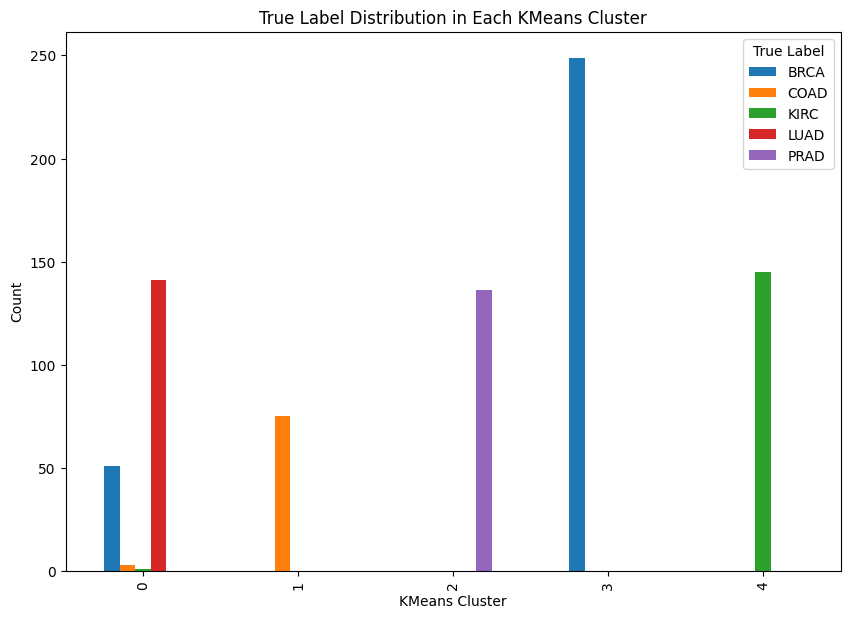

In [36]:
df = pd.DataFrame({'Label': labels['Class'], 'Cluster': kmeans.labels_})
cluster_counts = df.groupby(['Cluster', 'True Label']).size().unstack(fill_value=0)

cluster_counts.plot(kind='bar', stacked=False, figsize=(10, 7))
plt.title("True Label Distribution in Each KMeans Cluster")
plt.xlabel("KMeans Cluster")
plt.ylabel("Count")
plt.show()

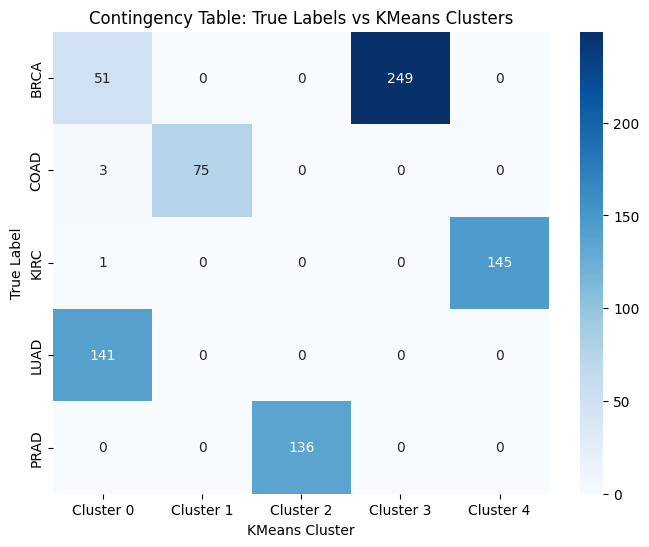

In [37]:
# Label encoding for true labels (strings to numbers)
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(labels['Class'])

# Create a contingency table (confusion matrix)
contingency_matrix = confusion_matrix(encoded_y, kmeans.labels_)

# Get the string names of the true labels and the cluster numbers
true_label_names = label_encoder.classes_
cluster_names = [f"Cluster {i}" for i in np.unique(kmeans.labels_)]

# Plotting the contingency matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=cluster_names, yticklabels=true_label_names)
plt.title("Contingency Table: True Labels vs KMeans Clusters")
plt.xlabel("KMeans Cluster")
plt.ylabel("True Label")
plt.show()